In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import bayes_op as bayes_op

In [21]:
# Leer datos desde el archivo results.csv
print(os.getcwd())
file_path = '../result/blackscholes_1_1.csv'
df = pd.read_csv(file_path)
print(df.head())
max_cpu_usage, max_memory_usage = bayes_op.optimize("blackscholes_1_1")

/home/danielcatu/documents/tesis/project/test
   num_invocation  current_num_invocation  wait_time  elapsed_time  real_time  \
0               1                       1    1.42475     53.282132     53.019   
1               1                       1    1.42475     53.282132     53.019   
2               1                       1    1.42475     53.282132     53.019   
3               1                       1    1.42475     53.282132     53.019   
4               1                       1    1.42475     53.282132     53.019   

   user_time  cpu_usage  memory_usage  timestamp  current_minute  
0     52.617   1.693271  2.862375e+09       1234               0  
1     52.617   1.693271  2.862375e+09       1234               0  
2     52.617   1.693271  2.862375e+09       1235               0  
3     52.617   1.693271  2.862375e+09       1235               0  
4     52.617   3.695507  2.862375e+09       1235               0  


FileNotFoundError: [Errno 2] No such file or directory: './result/blackscholes_1_1.csv'

In [3]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

2023-12-16 20:01:28.284769: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-16 20:01:28.876256: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 20:01:28.876293: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 20:01:28.997932: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 20:01:29.230455: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-16 20:01:29.231726: I tensorflow/core/platform/cpu_feature_guard.cc:1

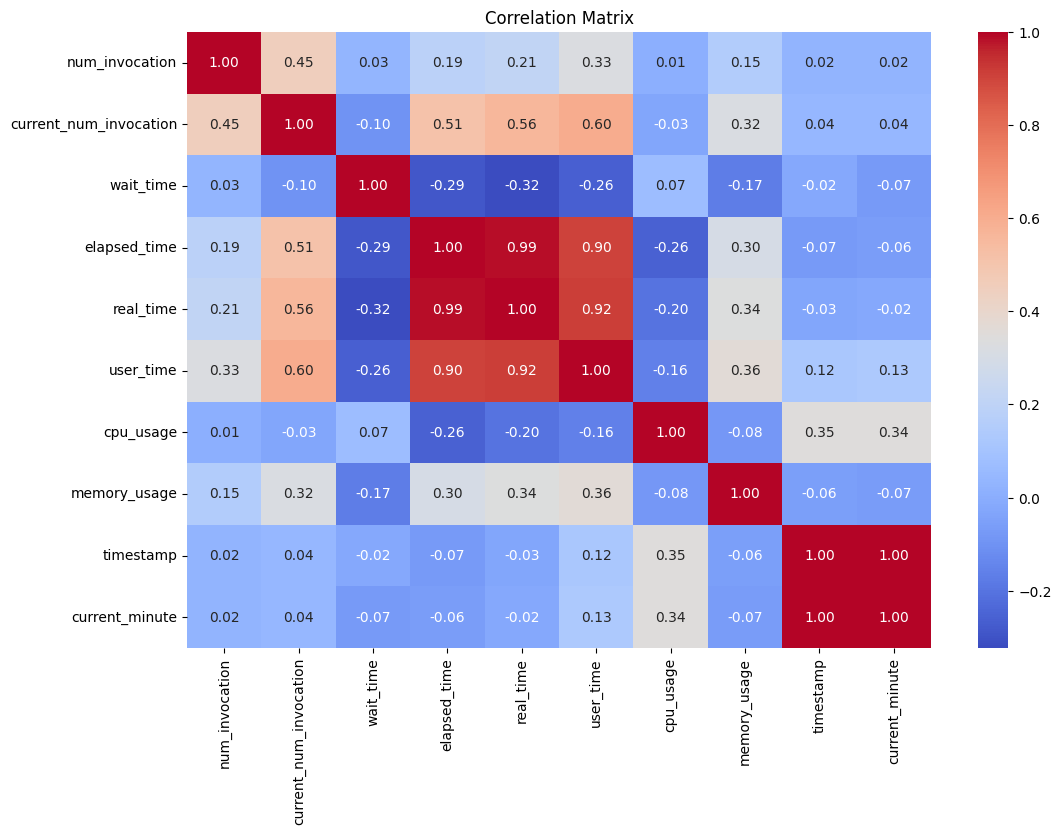

In [4]:
import seaborn as sns
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Preparing data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['cpu_usage', 'timestamp']])

# Function to create sequences for LSTM, grouped by timestamp

n_lags_lstm = 5  # Number of lags
y_lstm = scaled_data[:, 0]
X_lstm = scaled_data[:, 1]
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=0)

# # Reshaping input for LSTM model
X_train_lstm = X_train_lstm.reshape(-1, 1)
X_test_lstm = X_test_lstm.reshape(-1, 1)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,
               input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Training the LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=32, validation_data=(
    X_test_lstm, y_test_lstm), callbacks=[early_stopping], verbose=1)

# Predicting with LSTM model
y_pred_lstm_scaled = lstm_model.predict(X_test_lstm)
y_pred_lstm = scaler.inverse_transform(np.hstack(
    (y_pred_lstm_scaled.reshape(-1, 1), X_test_lstm)))  # Inverse scaling to original scale

# Ensure the target test data is also reshaped correctly for inverse transform
y_test_lstm_inverse = scaler.inverse_transform(np.hstack(
    (y_test_lstm.reshape(-1, 1), X_test_lstm)))  # Inverse scaling to original scale

# Correct MSE calculation
mse_raw = lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print("MSE on test set:", mse_raw)

Epoch 1/100
12/12 [==============================] - 2s 43ms/step - loss: 0.2934 - val_loss: 0.2937
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2264 - val_loss: 0.2181
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1556 - val_loss: 0.1364
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0852 - val_loss: 0.0666
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0432 - val_loss: 0.0419
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0380 - val_loss: 0.0420
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0372 - val_loss: 0.0423
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0359 - val_loss: 0.0427
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0357 - val_loss: 0.0418
Epoch 10/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0354 - val_loss: 0.0421
Epoch 11

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Function to create sequences for LSTM


def create_sequences(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i - n_lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Grouping the data by 1-minute intervals
df_grouped = df.groupby('timestamp')['memory_usage'].mean().reset_index()

# Scaling the 'memory_usage' data
scaler = MinMaxScaler(feature_range=(0, 1))
cpu_usage_scaled = scaler.fit_transform(df_grouped[['memory_usage']].values)

# Number of lags (sequence length)
n_lags_lstm = 7

# Creating sequences
X, y = create_sequences(cpu_usage_scaled, n_lags_lstm)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Reshaping input for LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,
               input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Training the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32,
               validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)
lstm_model.save("test1.h5")
# Evaluating the model on the test set
mse = lstm_model.evaluate(X_test, y_test, verbose=0)
print("MSE on test set:", mse)

# Predict function for rolling predictions


# def rolling_predictions(model, input_sequence, future_periods):
#     current_sequence = input_sequence.copy()
#     predictions = []
#     for _ in range(future_periods):
#         predicted_value = model.predict(
#             current_sequence.reshape(1, -1, 1))[0, 0]
#         predictions.append(predicted_value)
#         current_sequence = np.roll(current_sequence, -1)
#         current_sequence[-1] = predicted_value
#     return predictions


# # Example of making rolling predictions for the next 5 minutes
# # Use the last sequence from your data as the input sequence
# last_sequence = X[-1]
# future_predictions = rolling_predictions(lstm_model, last_sequence, 20)

# # Convert predictions back to original scale
# future_predictions_scaled = scaler.inverse_transform(
#     np.array(future_predictions).reshape(-1, 1))

# print("Predicted CPU Usage for the next 5 minutes:",
#       future_predictions_scaled.ravel())

Epoch 1/100
3/3 [==============================] - 2s 234ms/step - loss: 0.4658 - val_loss: 0.3325
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3426 - val_loss: 0.2305
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2289 - val_loss: 0.1322
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1188 - val_loss: 0.0481
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0351 - val_loss: 0.0164
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0248 - val_loss: 0.0548
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0558 - val_loss: 0.0458
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0346 - val_loss: 0.0204
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0138 - val_loss: 0.0158
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0172 - val_loss: 0.0210
Epoch 11/100
3/3 [

/home/danielcatu/documents/tesis/project/env/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:

from ann_visualizer.visualize import ann_viz;
import graphviz
ann_viz(lstm_model, title="My first neural network")

ValueError: invalid literal for int() with base 10: ''

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Function to create sequences for LSTM


def create_sequences(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i - n_lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Grouping the data by 1-minute intervals
df_grouped = df.groupby('timestamp')['memory_usage'].mean().reset_index()

# Scaling the 'memory_usage' data
scaler = MinMaxScaler(feature_range=(0, 1))
cpu_usage_scaled = scaler.fit_transform(df_grouped[['memory_usage']].values)

# Number of lags (sequence length)
n_lags_lstm = 7

# Creating sequences
X, y = create_sequences(cpu_usage_scaled, n_lags_lstm)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Reshaping input for LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,
               input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

# Training the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32,
               validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Evaluating the model on the test set
mse = lstm_model.evaluate(X_test, y_test, verbose=0)
print("MSE on test set:", mse)

# Predict function for rolling predictions


def rolling_predictions(model, input_sequence, future_periods):
    current_sequence = input_sequence.copy()
    predictions = []
    for _ in range(future_periods):
        predicted_value = model.predict(
            current_sequence.reshape(1, -1, 1))[0, 0]
        predictions.append(predicted_value)
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = predicted_value
    return predictions


# Example of making rolling predictions for the next 5 minutes
# Use the last sequence from your data as the input sequence
last_sequence = X[-1]
future_predictions = rolling_predictions(lstm_model, last_sequence, 20)

# Convert predictions back to original scale
future_predictions_scaled = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1))

print("Predicted CPU Usage for the next 5 minutes:",
      future_predictions_scaled.ravel())

Epoch 1/100
3/3 [==============================] - 3s 377ms/step - loss: 0.4835 - val_loss: 0.3343
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.3398 - val_loss: 0.2219
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.2182 - val_loss: 0.1222
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1063 - val_loss: 0.0444
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0306 - val_loss: 0.0165
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0242 - val_loss: 0.0486
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0519 - val_loss: 0.0467
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0361 - val_loss: 0.0232
Epoch 9/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0173 - val_loss: 0.0156
Epoch 10/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0148 - val_loss: 0.0193
Epoch 11/100
3/3 [

In [11]:
future_predictions_scaled.mean()

3894682400.0

In [56]:
np.array(future_predictions_scaled).mean()

5.2190294

In [38]:
df_grouped

,timestamp_group,cpu_usage
0,1020,0.004709
1,1021,1.146328
2,1022,2.598405
3,1023,5.167843
4,1024,3.046724
5,1025,3.583530
6,1026,4.363347
7,1027,2.697430
8,1028,4.435323
9,1029,2.925628


In [39]:
X

array([[0.        , 0.22110964, 0.50234909, 1.        , 0.58917995],
       [0.22110964, 0.50234909, 1.        , 0.58917995, 0.69314892],
       [0.50234909, 1.        , 0.58917995, 0.69314892, 0.8441845 ],
       [1.        , 0.58917995, 0.69314892, 0.8441845 , 0.52152834],
       [0.58917995, 0.69314892, 0.8441845 , 0.52152834, 0.85812491],
       [0.69314892, 0.8441845 , 0.52152834, 0.85812491, 0.56572586],
       [0.8441845 , 0.52152834, 0.85812491, 0.56572586, 0.51240843],
       [0.52152834, 0.85812491, 0.56572586, 0.51240843, 0.80814889],
       [0.85812491, 0.56572586, 0.51240843, 0.80814889, 0.87108904],
       [0.56572586, 0.51240843, 0.80814889, 0.87108904, 0.71994989],
       [0.51240843, 0.80814889, 0.87108904, 0.71994989, 0.83629091],
       [0.80814889, 0.87108904, 0.71994989, 0.83629091, 0.92951308],
       [0.87108904, 0.71994989, 0.83629091, 0.92951308, 0.62437254],
       [0.71994989, 0.83629091, 0.92951308, 0.62437254, 0.69647709],
       [0.83629091, 0.92951308, 0.

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Function to create sequences for LSTM
def create_sequences(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i - n_lags:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


# Preparing the raw data for LSTM without grouping by timestamp
cpu_usage_raw = df['memory_usage'].values

# Scaling the 'cpu_usage' data
scaler_raw = MinMaxScaler(feature_range=(0, 1))
cpu_usage_scaled_raw = scaler_raw.fit_transform(cpu_usage_raw.reshape(-1, 1))

# Number of lags (sequence length)
n_lags_lstm = 7

# Creating sequences with raw 'cpu_usage' data
X_raw, y_raw = create_sequences(cpu_usage_scaled_raw, n_lags_lstm)

# Splitting the data into training and testing sets
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=0)

# Reshaping input for LSTM model
X_train_raw = X_train_raw.reshape(X_train_raw.shape[0], X_train_raw.shape[1], 1)
X_test_raw = X_test_raw.reshape(X_test_raw.shape[0], X_test_raw.shape[1], 1)

# LSTM model for raw 'cpu_usage' data
lstm_model_raw = Sequential()
lstm_model_raw.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_raw.shape[1], 1)))
lstm_model_raw.add(LSTM(units=50))
lstm_model_raw.add(Dense(1))

lstm_model_raw.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping_raw = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the LSTM model
lstm_model_raw.fit(X_train_raw, y_train_raw, epochs=100, batch_size=32,
                   validation_data=(X_test_raw, y_test_raw), callbacks=[early_stopping_raw], verbose=1)

# Evaluating the model on the test set
mse_raw = lstm_model_raw.evaluate(X_test_raw, y_test_raw, verbose=0)
print("MSE on test set:", mse_raw)

ValueError: Input 0 of layer "lstm_58" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 50)

In [ ]:
0.007046499289572239

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Function to create sequences for LSTM
def create_sequences(input_data, output_data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(input_data)):
        X.append(input_data[i - n_lags:i, 0])
        y.append(output_data[i, 0])
    return np.array(X), np.array(y)

# Extracting 'current_minute' and 'cpu_usage' values
current_minute_data = df['current_minute'].values
cpu_usage_data = df['cpu_usage'].values

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
current_minute_scaled = scaler.fit_transform(current_minute_data.reshape(-1, 1))
cpu_usage_scaled = scaler.fit_transform(cpu_usage_data.reshape(-1, 1))

# Number of lags (sequence length)
n_lags_lstm = 5

# Creating sequences with 'current_minute' as input and 'cpu_usage' as output
X, y = create_sequences(current_minute_scaled, cpu_usage_scaled, n_lags_lstm)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Reshaping input for LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32,
               validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Evaluating the model on the test set
mse = lstm_model.evaluate(X_test, y_test, verbose=0)
print("MSE on test set:", mse)


Epoch 1/100
12/12 [==============================] - 2s 42ms/step - loss: 0.2163 - val_loss: 0.0895
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0578 - val_loss: 0.0619
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0408 - val_loss: 0.0505
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0399 - val_loss: 0.0451
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0370 - val_loss: 0.0431
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0350 - val_loss: 0.0423
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0342 - val_loss: 0.0408
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0340 - val_loss: 0.0402
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0335 - val_loss: 0.0401
Epoch 10/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0337 - val_loss: 0.0396
Epoch 11

In [11]:
mean_cpu_usage_train = np.mean(X_train)
baseline_predictions = np.full(shape=X_train.shape, fill_value=mean_cpu_usage_train)
baseline_mse = np.mean((y_train - baseline_predictions) ** 2)
baseline_rmse = np.sqrt(baseline_mse)
baseline_rmse

0.16153060462026847

In [7]:
mse = lstm_model.evaluate(X_test, y_test, verbose=0)
print("MSE on test set:", mse)

MSE on test set: 0.008417651057243347


In [164]:
scaled_new_data  = scaler.transform(np.array([0,1041]).reshape(-1, 2))
y_new_data = lstm_model.predict(np.array(scaled_new_data[0][1]).reshape(-1, 1))
y_test_lstm_inverse = scaler.inverse_transform(np.hstack(
    (y_new_data.reshape(-1, 1), np.array(scaled_new_data[0][1]).reshape(-1, 1))))
y_test_lstm_inverse

1/1 [==============================] - 0s 15ms/step


/home/danielcatu/documents/tesis/project/env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[   4.9242917, 1041.       ]])